# 3. Exchange Economy

In [19]:
%matplotlib inline
import numpy as np
import sympy as sm
import pandas as pd
import scipy as sp
from scipy.stats import skew
from scipy.stats import kurtosis
import math
from mpl_toolkits.mplot3d import Axes3D
import itertools
import ipywidgets as widgets
import matplotlib.pyplot as plt

We consider an exchange economy with 3 goods, N consumers indexed by j and Cobb-Douglas preferences with log-normally distributed coefficients.

$u^j (x_1, x_2, x_3) = (x_1^{B_1^j} x_2^{B_2^j} x_3^{B_3^j})$

$ \beta_i^j = \frac{\alpha_i^j}{\alpha_1^j + \alpha_2^j + \alpha_3^j} $  <br/>
$ \alpha^j = (\alpha_1^j, \alpha_2^j, \alpha_3^j) $ <br/>
$ log(a^j) \sim \mathcal{N} (\mu, \Sigma) $

Endowments are exponentially distributed:

$ e^j = (e_1^j, e_2^j, e_3^j)$ <br/>
$ e_i^j \sim f, f(z: \zeta) = 1/\zeta \exp(-z\zeta) $

We let p = 3 be the **numeraire**. The implied **demand functions** are:

$ x_i^{*j} (p_1, p_2, e^j) = \beta_i^j \frac{I^j}{p_i} $ <br/> 
where consumer j's income is given by <br/>
$ I^j = p_1 e_1^j + p_2 e_2^j + p_3 e_3^j  $

In [20]:
# a. parameters
N = 50000
mu = np.array([1.5,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas  = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

## **Question 3.1**

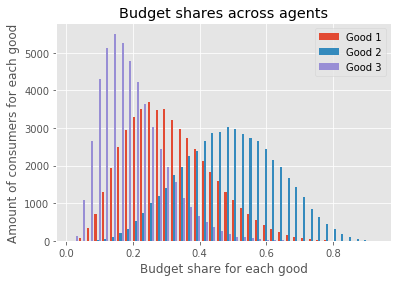

In [21]:
plt.hist(betas, bins = 40, label = ['Good 1', 'Good 2', 'Good 3'])
plt. title('Budget shares across agents')
plt.xlabel('Budget share for each good')
plt.ylabel('Amount of consumers for each good')
plt.legend()

In [4]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas  = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

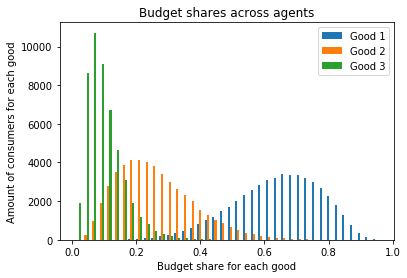

In [5]:
plt.hist(betas, bins = 40, label = ['Good 1', 'Good 2', 'Good 3'])
plt. title('Budget shares across agents')
plt.xlabel('Budget share for each good')
plt.ylabel('Amount of consumers for each good')
plt.legend()

We notice that the budget share across agents depends on the $\mu$-vector due to its role in determining the consumer's valuation of each good. Good 3 has the lowest value for consumers for the given $\mu$-vector and therefore the lowest budget share.

## **Question 3.2**

In [22]:
# demand functions
def good1_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,0]*I/p1

def good2_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,1]*I/p2

def good3_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,2]*I

# excess demand function 1
def excess1_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_1 = np.sum(good1_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_1 = np.sum(e1)
    
    # excess demand
    excess_demand_1 = demand_1 - supply_1
    
    return excess_demand_1

# excess demand function 2
def excess2_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_2 = np.sum(good2_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_2 = np.sum(e2)
    
    # excess demand
    excess_demand_2 = demand_2 - supply_2
    
    return excess_demand_2

# excess demand function 3
def excess3_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_3 = np.sum(demand_good_3_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_3 = np.sum(e3)
    
    # excess demand
    excess_demand_3 = demand_3 - supply_3
    
    return excess_demand_3

In [23]:
size = 50

linspace_p1 = np.linspace(1, 10, size)
linspace_p2 = np.linspace(1, 10, size)

grid1_empty = np.empty((size,size))
grid2_empty = np.empty((size,size))

p1_grid, p2_grid = np.meshgrid(linspace_p1, linspace_p2) 
for i,p1 in enumerate(linspace_p1):
    for j,p2 in enumerate(linspace_p2):
        grid1_empty[i,j] = excess_demand_func_1(betas, p1 , p2, e1, e2, e3)
        grid2_empty[i,j] = excess_demand_func_2(betas, p1 , p2, e1, e2, e3)

Text(0.5, 0, '$p_2$')

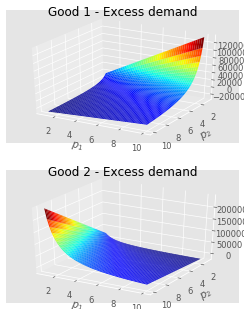

In [24]:
fig = plt.figure(dpi=60, figsize=(5,10))

# Excess demand of good 1 plotted in 3D
axis1 = fig.add_subplot(3,1,1, projection = '3d')
fig1 = axis1.plot_surface(p1_grid, p2_grid, grid1_empty, cmap=plt.cm.jet, cstride=1, rstride=1)


# Visuals for demand 1
axis1.invert_yaxis()
axis1.set_title('Good 1 - Excess demand')
axis1.set_xlabel('$p_1$')
axis1.set_ylabel('$p_2$')


#Excess demand of good 2 plotted in 3D
axis2 = fig.add_subplot(3,1,2, projection = '3d')
fig2 = axis2.plot_surface(p1_grid, p2_grid, grid2_empty, cmap=plt.cm.jet, cstride=1, rstride=1)

# Visuals for demand 2
axis2.invert_yaxis()
axis2.set_title('Good 2 - Excess demand')
axis2.set_xlabel('$p_1$')
axis2.set_ylabel('$p_2$')

## **Question 3.3**

The Walras-equilibrium is found by a trial-and-error process, namely a tâtonnement process. Our solution is the price points for goods 1 and 2 when no demand for good 3 is present. <br/> 
We initially set the pricepoints to $p_1=2$ and $p_2=2$ and set our tolerance is set at $\frac{1}{100.000}$. We set t equal to 1 and let it move towards the cap at $25.000$ such that the iteration reaches its goal.

In [34]:
epsilon = 0.000001
kappa = 0.05
p1 = 2
p2 = 2

t=1
cap = 25000

while t < cap:
    ex0_1 = excess1_func(betas, p1, p2, e1, e2, e3)
    ex0_2 = excess2_func(betas, p1, p2, e1, e2, e3)
    
    if ex0_1 < epsilon and ex0_2 < epsilon:
        print(f'\nBy iterating 23.432 times, we find that the price of good 1 and 2 in Walras Equilibrium are: p1 = {p1: .3f} and p2 = {p2: .3f} when there exists no excess demand for good 3.')
        p1target = p1
        p2target = p2
        break
    else:
        p1 += kappa*ex0_1/N
        p2 += kappa*ex0_2/N
    
    if (t%5 == 0 and t<=50) or t%2500 == 0 or t == 500 or t == 23432 or t == 23433:
        print(f'Iteration {t} -> ex0_1:{ex0_1:10.4f} - ex0_2: {ex0_2:01.4f} -> p1: {p1:10.4f} - p2: {p2:10.4f}')
             
    t += 1

Iteration 5 -> ex0_1:41230.0082 - ex0_2: 18501.2555 -> p1:     2.2093 - p2:     2.0901
Iteration 10 -> ex0_1:39958.6565 - ex0_2: 19445.3407 -> p1:     2.4115 - p2:     2.1856
Iteration 15 -> ex0_1:38957.8912 - ex0_2: 20148.4151 -> p1:     2.6082 - p2:     2.2850
Iteration 20 -> ex0_1:38149.1782 - ex0_2: 20672.8157 -> p1:     2.8005 - p2:     2.3874
Iteration 25 -> ex0_1:37481.5829 - ex0_2: 21063.9992 -> p1:     2.9892 - p2:     2.4919
Iteration 30 -> ex0_1:36920.6526 - ex0_2: 21355.2571 -> p1:     3.1749 - p2:     2.5982
Iteration 35 -> ex0_1:36442.2733 - ex0_2: 21571.1044 -> p1:     3.3580 - p2:     2.7056
Iteration 40 -> ex0_1:36029.0794 - ex0_2: 21729.7071 -> p1:     3.5390 - p2:     2.8140
Iteration 45 -> ex0_1:35668.2586 - ex0_2: 21844.6173 -> p1:     3.7180 - p2:     2.9230
Iteration 50 -> ex0_1:35350.1575 - ex0_2: 21926.0158 -> p1:     3.8954 - p2:     3.0325
Iteration 500 -> ex0_1:30779.4351 - ex0_2: 20696.3963 -> p1:    18.2381 - p2:    12.5967
Iteration 2500 -> ex0_1:29902.96

## **Question 3.4**

We define the utility function given the specifications in the description <br/>
$ u^j (x_1, x_2, x_3) = (x_{1}^{\beta^j_1} x_{2}^{\beta^j_2} x_{3}^{\beta^j_3} )^{\gamma} $ <br/>
We include $ \gamma $ in the variables

    
    

In [35]:
def uj(betas, gamma, p1, p2, e1, e2, e3):
    
    # We use the calculated quantities to determine the consumers' utilities.
    quantity1 = good1_func(betas, p1, p2, e1, e2, e3)
    quantity2 = good2_func(betas, p1, p2, e1, e2, e3)
    quantity3 = good3_func(betas, p1, p2, e1, e2, e3)
    
    # Betas
    good1_betas = np.array([x[0] for x in betas])
    good2_betas = np.array([x[1] for x in betas])
    good3_betas = np.array([x[2] for x in betas])
    
    # Calculation of consumers' utilities.
    return ((quantity1**good1_betas)*(quantity2**good2_betas)*(quantity3**good3_betas))**gamma
    

We set the prices of goods one and two equal to the values determined in **3.3**

In [41]:
p1 = 6.490
p2 = 2.617
uj_stars = uj(betas, gamma, p1, p2, e1, e2, e3)

mean :  1.4227733846005763
variance :  0.1191064142361715
skewness :  1.3317178380548873
kurtosis :  2.961971643987617


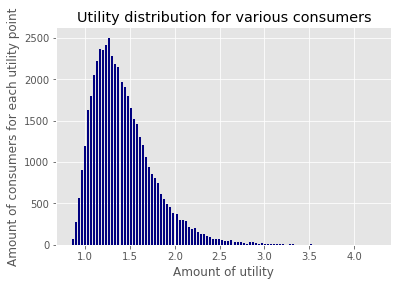

In [42]:
plt.style.use('ggplot')
plt.hist(uj_stars, bins = 100, rwidth = 0.65579, color = 'navy')
plt. title('Utility distribution for various consumers')
plt.xlabel('Amount of utility')
plt.ylabel('Amount of consumers for each utility point')
print("mean : "      , np.mean(utility_stars))
print("variance : "  , np.var(utility_stars))
print("skewness : "  , skew(utility_stars))
print("kurtosis : "  , kurtosis(utility_stars))

## **Question 3.5**

We begin by setting all endowments equal to the mean utility

In [43]:
e1 = np.mean(utility_stars)
e1 = np.mean(utility_stars)
e1 = np.mean(utility_stars)


In [44]:
# Set new set of endowments, equal to mean of each initial endowment
e1_new = np.zeros(N)+np.mean(e1)
e2_new = np.zeros(N)+np.mean(e2)
e3_new = np.zeros(N)+np.mean(e3)

p1 = 10
p2 = 2

# We define a new utility function for the evenly distributed endowments
uj_new = uj(betas, gamma, p1, p2, e1, e2, e3)

(array([2.400e+01, 1.020e+02, 2.310e+02, 3.430e+02, 5.740e+02, 7.300e+02,
        9.350e+02, 1.090e+03, 1.300e+03, 1.406e+03, 1.390e+03, 1.538e+03,
        1.659e+03, 1.652e+03, 1.782e+03, 1.867e+03, 1.861e+03, 1.743e+03,
        1.771e+03, 1.706e+03, 1.712e+03, 1.596e+03, 1.565e+03, 1.563e+03,
        1.473e+03, 1.380e+03, 1.299e+03, 1.303e+03, 1.199e+03, 1.119e+03,
        1.071e+03, 9.800e+02, 8.920e+02, 8.160e+02, 7.870e+02, 7.280e+02,
        6.480e+02, 6.310e+02, 5.610e+02, 4.870e+02, 4.980e+02, 4.240e+02,
        4.090e+02, 3.360e+02, 3.100e+02, 2.820e+02, 2.150e+02, 2.170e+02,
        2.000e+02, 1.680e+02, 1.600e+02, 1.440e+02, 1.120e+02, 1.300e+02,
        1.180e+02, 1.040e+02, 6.500e+01, 8.800e+01, 5.100e+01, 5.100e+01,
        5.000e+01, 3.300e+01, 3.700e+01, 3.700e+01, 2.800e+01, 2.200e+01,
        3.000e+01, 1.700e+01, 1.600e+01, 1.400e+01, 1.200e+01, 1.200e+01,
        1.100e+01, 1.000e+01, 1.300e+01, 7.000e+00, 7.000e+00, 9.000e+00,
        8.000e+00, 4.000e+00, 2.000e+0

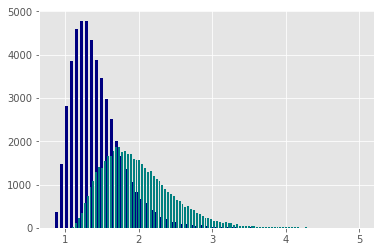

In [54]:
# We plot the new values in a histogram
plt.hist(uj_stars, bins = 50, label = 'Exponentially distributed endowments', color = 'navy', rwidth = 0.65579)
plt.hist(uj_new, bins = 100, label = 'Evenly distributed endowments', color = 'teal', rwidth = 0.65579)